# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
from citipy import citipy

from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats,lngs)
#city
cities=[]
for lat_lang in lat_lngs:
    city = citipy.nearest_city(lat_lang[0],lat_lang[1]).city_name
    if city not in cities:
        cities.append(city)
    
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#decided not to use the dictionary and creating 9 empty lists and appending to the dict. 
#I decided to go with one list
data=[]
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
i=0
headers=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        data.append([response['name'],response['coord']['lat'],response['coord']['lon'],response['main']['temp_max'],
                   response['main']['humidity'],response['clouds']['all'],response['wind']['speed'],
                   response['sys']['country'],response['dt']])
#I assumed when you city id it was id number I found in response
        print(f' Processing weather for {city} and the number {response["id"]}:{i}-{response["name"]}')
        i+=1
        if i%50 == 0:
            time.sleep(40)          
    except:
        print('No data for city {city}')  

 Processing weather for yellowknife and the number 6185377:0-Yellowknife
 Processing weather for bethel and the number 5282297:1-Bethel
 Processing weather for vaini and the number 4032243:2-Vaini
 Processing weather for georgetown and the number 1735106:3-George Town
 Processing weather for alta floresta and the number 6316343:4-Alta Floresta
 Processing weather for rikitea and the number 4030556:5-Rikitea
 Processing weather for pevek and the number 2122090:6-Pevek
 Processing weather for maceio and the number 3395981:7-Maceió
 Processing weather for port alfred and the number 964432:8-Port Alfred
 Processing weather for carnarvon and the number 2074865:9-Carnarvon
 Processing weather for bonthe and the number 2409914:10-Bonthe
 Processing weather for srednekolymsk and the number 2121025:11-Srednekolymsk
 Processing weather for megion and the number 1499053:12-Megion
 Processing weather for saint-philippe and the number 935215:13-Saint-Philippe
 Processing weather for hobart and the 

 Processing weather for evensk and the number 2125693:121-Evensk
 Processing weather for dingle and the number 1714733:122-Dingle
 Processing weather for fairbanks and the number 5861897:123-Fairbanks
 Processing weather for bengkulu and the number 1649150:124-Bengkulu
 Processing weather for bredasdorp and the number 1015776:125-Bredasdorp
 Processing weather for teknaf and the number 1185095:126-Teknāf
No data for city {city}
 Processing weather for mount gambier and the number 2156643:127-Mount Gambier
 Processing weather for taree and the number 2147381:128-Taree
 Processing weather for bereda and the number 3105522:129-Bereda
 Processing weather for jalu and the number 86049:130-Jalu
 Processing weather for hasaki and the number 2112802:131-Hasaki
 Processing weather for dikson and the number 1507390:132-Dikson
 Processing weather for dilla and the number 338998:133-Dilla
 Processing weather for da nang and the number 1583992:134-Turan
 Processing weather for tiznit and the number

No data for city {city}
 Processing weather for itarema and the number 3393692:235-Itarema
 Processing weather for galveston and the number 4692856:236-Galveston
No data for city {city}
No data for city {city}
No data for city {city}
 Processing weather for batagay-alyta and the number 2027042:237-Batagay-Alyta
 Processing weather for whitehorse and the number 6180550:238-Whitehorse
 Processing weather for constitucion and the number 3893726:239-Constitución
 Processing weather for pudozh and the number 504269:240-Pudozh
 Processing weather for prince rupert and the number 6113406:241-Prince Rupert
 Processing weather for portland and the number 5746545:242-Portland
 Processing weather for auki and the number 2109701:243-Auki
 Processing weather for champasak and the number 1657818:244-Champasak
 Processing weather for mortka and the number 1498402:245-Mortka
 Processing weather for torbay and the number 6167817:246-Torbay
 Processing weather for fayaoue and the number 2141305:247-Faya

 Processing weather for llangefni and the number 2644037:347-Llangefni
 Processing weather for kiunga and the number 2093846:348-Kiunga
 Processing weather for dicabisagan and the number 1715015:349-Dicabisagan
 Processing weather for olinda and the number 3393536:350-Olinda
 Processing weather for port keats and the number 2063039:351-Port Keats
 Processing weather for kiama and the number 2161515:352-Kiama
No data for city {city}
No data for city {city}
 Processing weather for nizwa and the number 286987:353-Nizwá
 Processing weather for bardiyah and the number 80509:354-Al Bardīyah
 Processing weather for havre-saint-pierre and the number 5972291:355-Havre-St-Pierre
 Processing weather for port hedland and the number 2063042:356-Port Hedland
 Processing weather for sorland and the number 3137469:357-Sørland
 Processing weather for wenatchee and the number 5815342:358-Wenatchee
 Processing weather for guerrero negro and the number 4021858:359-Guerrero Negro
No data for city {city}
 P

 Processing weather for moron and the number 3430545:463-Morón
No data for city {city}
 Processing weather for kavaratti and the number 1267390:464-Kavaratti
 Processing weather for salcininkai and the number 595016:465-Šalčininkai
 Processing weather for dawei and the number 1293625:466-Dawei
 Processing weather for angola and the number 3351879:467-Angola
 Processing weather for coquimbo and the number 3893629:468-Coquimbo
 Processing weather for haines junction and the number 5969025:469-Haines Junction
 Processing weather for tabuk and the number 1684803:470-Tabuk
 Processing weather for juneau and the number 5554072:471-Juneau
 Processing weather for praia and the number 3374333:472-Praia
 Processing weather for wewak and the number 2083537:473-Wewak
 Processing weather for luderitz and the number 3355672:474-Lüderitz
 Processing weather for honningsvag and the number 779554:475-Honningsvåg
 Processing weather for penzance and the number 2640377:476-Penzance
 Processing weather fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data = pd.DataFrame(data,columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.46,-114.35,21.20,92,90,16.11,CA,1604178627
1,Bethel,41.37,-73.41,45.00,39,1,6.93,US,1604178781
2,Vaini,-21.20,-175.20,75.20,83,75,11.41,TO,1604178782
3,George Town,5.41,100.34,75.20,94,20,4.70,MY,1604178782
4,Alta Floresta,-9.88,-56.09,85.71,58,100,2.33,BR,1604178782


In [6]:
cleaned_weather_data = weather_data.dropna(how="any")
cleaned_weather_data.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
cleaned_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,18.809545,20.241457,58.423297,71.797814,50.763206,7.858251,1.604179e+09
std,33.471107,89.912069,22.554715,21.367251,40.182958,5.365404,1.570319e+02
min,-54.800000,-179.170000,-11.600000,7.000000,0.000000,0.510000,1.604178e+09
25%,-8.900000,-63.040000,43.590000,63.000000,1.000000,3.470000,1.604179e+09
50%,22.080000,26.690000,64.400000,77.000000,51.000000,6.930000,1.604179e+09
75%,47.500000,100.350000,76.620000,88.000000,92.000000,10.630000,1.604179e+09
max,78.220000,179.320000,95.410000,100.000000,100.000000,32.210000,1.604179e+09


In [8]:
#Save cleaned data
cleaned_weather_data.to_csv(output_data_file)

In [9]:
#  Get the indices of cities that have humidity over 100%.
greater_than_100_humidity_idx = cleaned_weather_data.loc[cleaned_weather_data['Humidity'] > 100].index
greater_than_100_humidity_idx

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cleaned_weather_data.drop(greater_than_100_humidity_idx)
clean_city_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.46,-114.35,21.20,92,90,16.11,CA,1604178627
1,Bethel,41.37,-73.41,45.00,39,1,6.93,US,1604178781
2,Vaini,-21.20,-175.20,75.20,83,75,11.41,TO,1604178782
3,George Town,5.41,100.34,75.20,94,20,4.70,MY,1604178782
4,Alta Floresta,-9.88,-56.09,85.71,58,100,2.33,BR,1604178782
5,Rikitea,-23.12,-134.97,75.47,68,0,6.04,PF,1604178782
6,Pevek,69.70,170.31,13.30,96,62,11.97,RU,1604178782
7,Maceió,-9.67,-35.74,80.60,78,20,14.99,BR,1604178782
8,Port Alfred,-33.59,26.89,63.36,81,63,13.40,ZA,1604178782
9,Carnarvon,-24.87,113.63,69.80,83,75,12.75,AU,1604178782


In [11]:
date_index = clean_city_data.head(10).index.values[0]
run_date = clean_city_data.at[date_index,'Date']
date_of_analysis = datetime.datetime.fromtimestamp(int(run_date)).strftime('%Y-%m-%d')
date_of_analysis

'2020-10-31'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

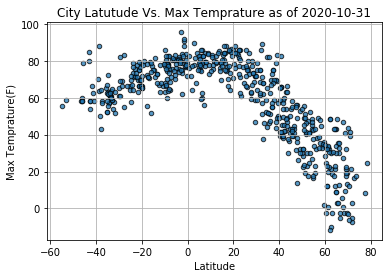

In [12]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Max Temp',marker="o", facecolors="red", edgecolors="black",alpha=0.75)

ax.set_ylabel('Max Temprature(F)')
ax.set_xlabel('Latitude')
label = 'City Latutude Vs. Max Temprature as of ' + date_of_analysis
ax.set_title(label)
ax.grid()
fig = ax.get_figure()
fig.savefig('../output_data/LatvsTemp')

Based on the curve, it looks like there is a relationship betwen max temp and latitude. As we move away from 0 (equator) in the positive direction (northern hemisphere) the temprature decreses and towards the negative latitude temprature i.e. souther hemisphere is in the higher range.

## Latitude vs. Humidity Plot

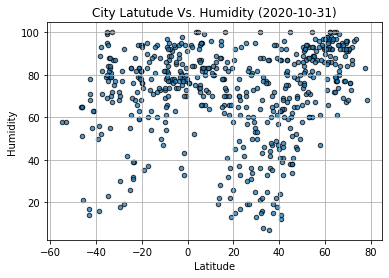

In [13]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Humidity',marker="o", facecolors="red", edgecolors="black",alpha=0.75)
ax.set_ylabel('Humidity')
ax.set_xlabel('Latitude')
label = f'City Latutude Vs. Humidity ({date_of_analysis})'
ax.set_title(label)
ax.grid()
fig = ax.get_figure()
fig.savefig('../output_data/latvshumidity.png')

Looks like there is not much of relationship as the points are scattered and does not fit a pattern.

## Latitude vs. Cloudiness Plot

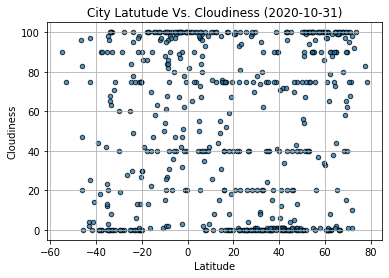

In [14]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Cloudiness',marker="o", facecolors="red", edgecolors="black",alpha=0.75)
ax.set_ylabel('Cloudiness')
ax.set_xlabel('Latitude')
label = f'City Latutude Vs. Cloudiness ({date_of_analysis})'
ax.set_title(label)
ax.grid()
fig = ax.get_figure()
fig.savefig('../output_data/latvscloudiness.png')

Cloudiness and where you are in the latitude has no relationship. Points are scattered and no pattern (linear relationship) emerges.

## Latitude vs. Wind Speed Plot

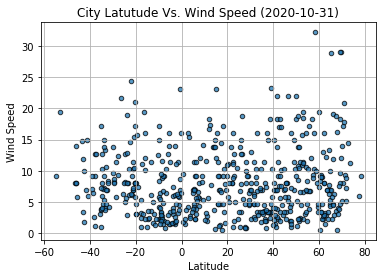

In [15]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Wind Speed',marker="o", facecolors="red", edgecolors="black",alpha=0.75)
ax.set_ylabel('Wind Speed')
ax.set_xlabel('Latitude')
label = f'City Latutude Vs. Wind Speed ({date_of_analysis})'
ax.set_title(label)
ax.grid()
fig = ax.get_figure()
fig.savefig('../output_data/latvswindspeed.png')

Wind speed remains a constant whereever you are in the latiture except for a few outliers.

## Linear Regression

In [16]:
northern_hemi = clean_city_data.loc[clean_city_data.Lat > 0]
northern_hemi.reset_index()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Yellowknife,62.46,-114.35,21.20,92,90,16.11,CA,1604178627
1,1,Bethel,41.37,-73.41,45.00,39,1,6.93,US,1604178781
2,3,George Town,5.41,100.34,75.20,94,20,4.70,MY,1604178782
3,6,Pevek,69.70,170.31,13.30,96,62,11.97,RU,1604178782
4,10,Bonthe,7.53,-12.51,79.25,80,0,4.29,SL,1604178782
...,...,...,...,...,...,...,...,...,...,...
356,542,Lachhmangarh,27.82,75.03,59.22,31,0,0.83,IN,1604179223
357,543,Tegul'det,57.31,88.17,32.83,96,100,8.81,RU,1604179223
358,544,Pochutla,15.74,-96.47,88.00,62,20,9.17,MX,1604179224
359,547,Ardakān,32.31,54.02,57.20,22,0,2.30,IR,1604179224


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

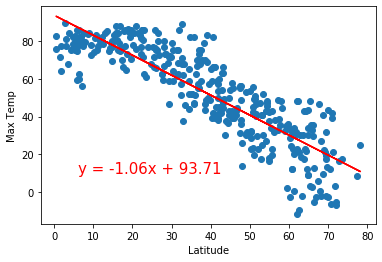

The r-value is: -0.8616164391826315


<Figure size 432x288 with 0 Axes>

In [17]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f'The r-value is: {rvalue}')
plt.savefig('../output_data/regr_nh_temp_v_lat.png')

In the northern hemisphere the latitude and the max temprature seem to have a strong inverse relationship. The farther you are from latitude of 0 (northern hemisphere > 0) the temprature goes down. Makes sense as the sun is closest to equator (which is latitude of 0) Ravlue of -0.87 proves the negative linear relationship.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

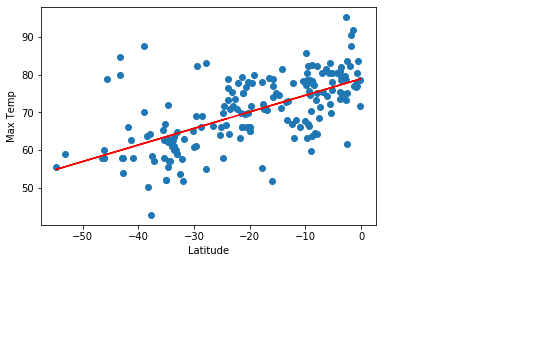

The r-value is: 0.6327850841276177


<Figure size 432x288 with 0 Axes>

In [18]:
southern_hemi = clean_city_data.loc[clean_city_data.Lat < 0]
southern_hemi.reset_index()
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f'The r-value is: {rvalue}')
plt.savefig('../output_data/regr_sh_temp_v_lat.png')

In the southern hemisphere the rvalue of 0.62 indicates a somewhat strong linear uphill relation ship between latitude and max temp. The closer to 0 latitude higher the max temprature. If I did not compute and I saw the points I would have put rvalue at 0.4.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

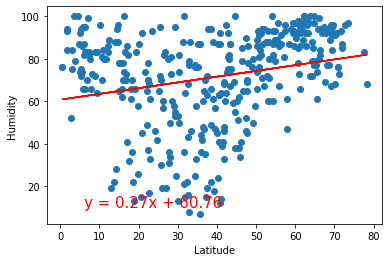

The r-value is: 0.2421947588259392


<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f'The r-value is: {rvalue}')
plt.savefig('../output_data/regr_nh_humid_v_lat.png')

Rvalue os 0.30. There is somewhat of weak correlation between latitude and humidity. As you can note the points are disparate around the line. Where you are on the latitude does not really matter if humidity is a factor you are measuring.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

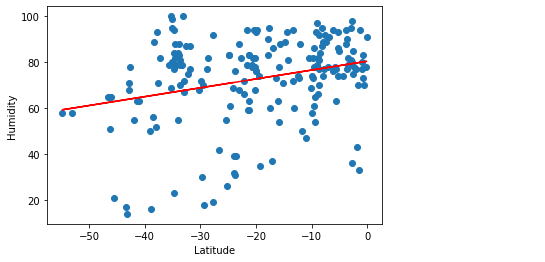

The r-value is: 0.27666999360311323


<Figure size 432x288 with 0 Axes>

In [20]:
southern_hemi = clean_city_data.loc[clean_city_data.Lat < 0]
southern_hemi.reset_index()
x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f'The r-value is: {rvalue}')
plt.savefig('../output_data/regr_sh_humid_v_lat.png')

In the souther hemisphere there very little correlation between latitude and humidity. The rvalue of 0.11 clearly shows that there is not much of a relationship between the 2 variables.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

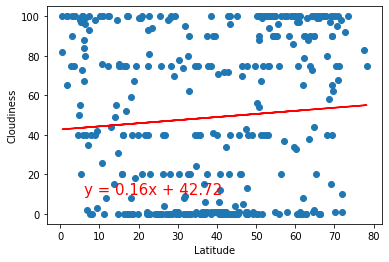

The r-value is: 0.07790988287084008


<Figure size 432x288 with 0 Axes>

In [21]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f'The r-value is: {rvalue}')
plt.savefig('../output_data/regr_nh_cloudy_v_lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

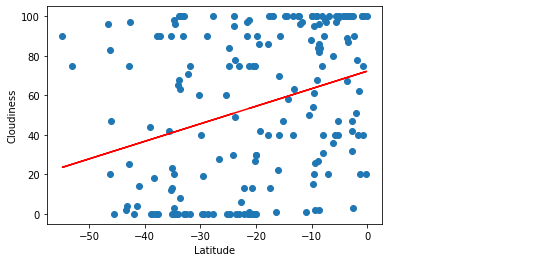

The r-value is: 0.3093761388172272


<Figure size 432x288 with 0 Axes>

In [22]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f'The r-value is: {rvalue}')
plt.savefig('../output_data/regr_sh_cloudy_v_lat.png')

If you look at both the above pictures depicting the hemispheres vs. cloudiness there is no correlation at all. You see the points scattered everywhere meaning no linear relationship could be established. The rvalues which are 0.19 for northern hemisphere and cloudiness, 0.20 for southern hemisphere and cloudiness attest to the fact that there is not much of anything.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

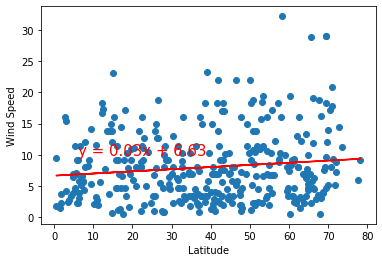

The r-value is: 0.1254724051032868


<Figure size 432x288 with 0 Axes>

In [23]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f'The r-value is: {rvalue}')
plt.savefig('../output_data/regr_nh_windspeed_v_lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

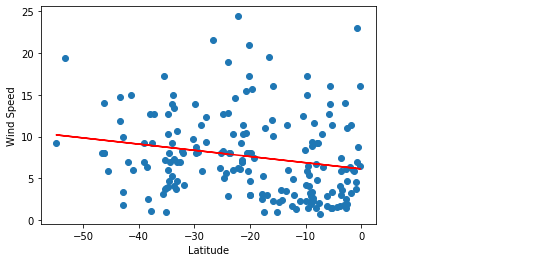

The r-value is: -0.2028214941512071


<Figure size 432x288 with 0 Axes>

In [24]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f'The r-value is: {rvalue}')
plt.savefig('../output_data/regr_sh_windspeed_v_lat.png')

0.12 rvalue for northern hemisphere vs wind speed and -0.20 rvalue for southern hemisphere and wind speed indicate that there is barely any relationship to be established. Eventhough one is a +ve number indication a positive linear relationship the number is too small to establish one. The same can be said about the southern hemisphere.